In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.spatial.distance import pdist

## Iris

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
?dendrogram

In [3]:
iris_hac_single = linkage(iris.data, "single")
iris_hac_complete = linkage(iris.data, "complete")
iris_hac_average = linkage(iris.data, "average")
iris_hac_centroid = linkage(iris.data, "centroid")

In [18]:
?dendrogram

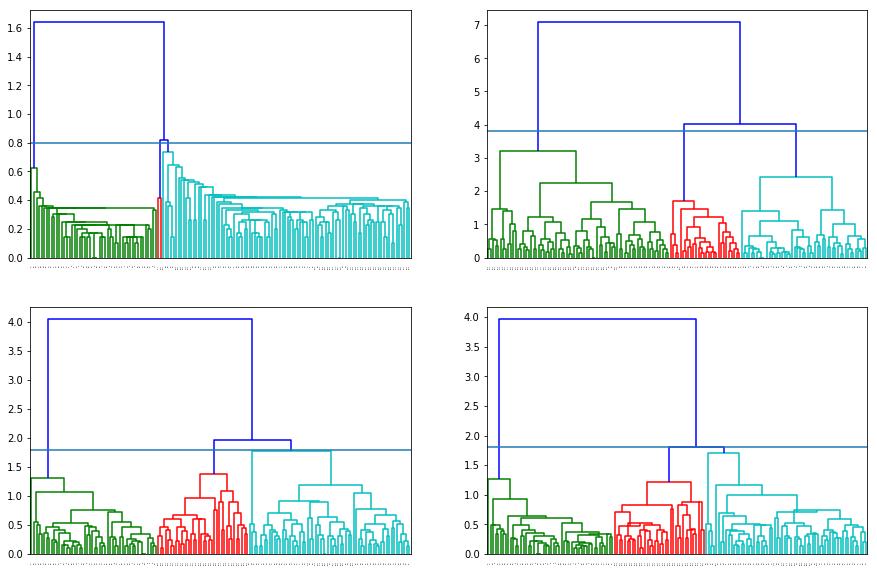

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(221)
dendrogram(iris_hac_single, leaf_font_size=2, color_threshold=0.8)
plt.axhline(0.8)

plt.subplot(222)
dendrogram(iris_hac_complete, leaf_font_size=2, color_threshold=3.8)
plt.axhline(3.8)

plt.subplot(223)
dendrogram(iris_hac_average, leaf_font_size=2, color_threshold=1.8)
plt.axhline(1.8)

plt.subplot(224)
dendrogram(iris_hac_centroid, leaf_font_size=2, color_threshold=1.8)
plt.axhline(1.8)

plt.show()

In [21]:
iris_single = cut_tree(iris_hac_single, n_clusters=3)
iris_complete = cut_tree(iris_hac_complete, n_clusters=3)
iris_average = cut_tree(iris_hac_average, n_clusters=3)
iris_centroid = cut_tree(iris_hac_centroid, n_clusters=3)

In [22]:
from sklearn.metrics import confusion_matrix
print("Single \n", confusion_matrix(iris_single, iris.target))
print("\nComplete \n", confusion_matrix(iris_complete, iris.target))
print("\nAverage \n", confusion_matrix(iris_average, iris.target))
print("\nCentroid \n", confusion_matrix(iris_centroid, iris.target))

Single 
 [[50  0  0]
 [ 0 50 48]
 [ 0  0  2]]

Complete 
 [[50  0  0]
 [ 0 23 49]
 [ 0 27  1]]

Average 
 [[50  0  0]
 [ 0 50 14]
 [ 0  0 36]]

Centroid 
 [[50  0  0]
 [ 0 50 14]
 [ 0  0 36]]


## Digits

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()

In [24]:
digits_hac = linkage(digits.data, "average")
digits_hac_cos = linkage(digits.data, "average", "cosine")

In [26]:
?dendrogram

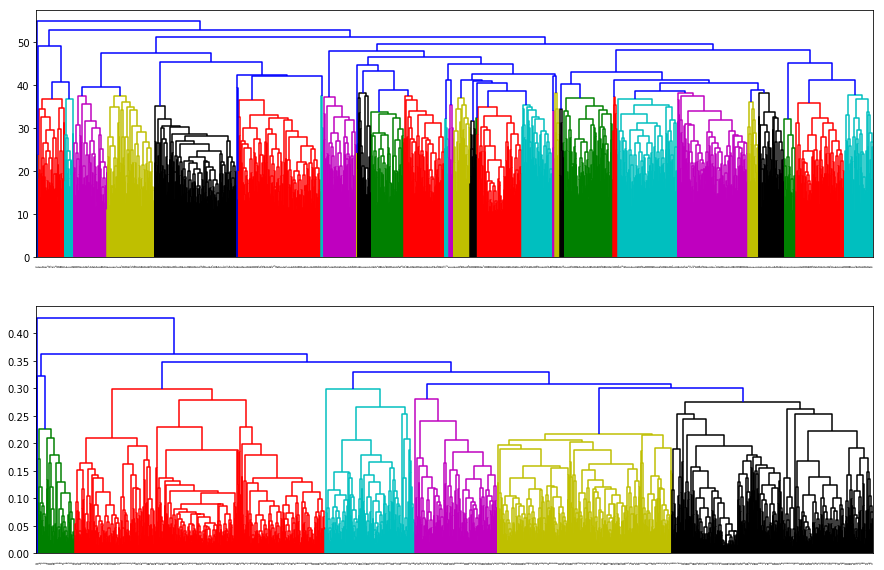

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(211)
dendrogram(digits_hac, leaf_font_size=1)

plt.subplot(212)
dendrogram(digits_hac_cos, leaf_font_size=1)

plt.show()

In [28]:
digits_average = cut_tree(digits_hac, n_clusters=10)
digits_average_cos = cut_tree(digits_hac_cos, n_clusters=10)

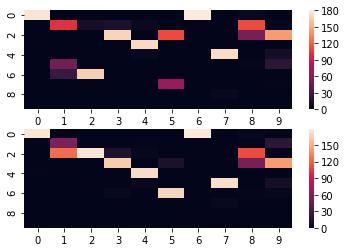

In [29]:
plt.subplot(211)
sns.heatmap(confusion_matrix(digits_average, digits.target))

plt.subplot(212)
sns.heatmap(confusion_matrix(digits_average_cos, digits.target))

plt.show()

In [39]:
from sklearn.metrics.cluster import v_measure_score
print(v_measure_score(digits.target, digits_average.reshape(1, 1797)[0]))
print(v_measure_score(digits.target, digits_average_cos.reshape(1, 1797)[0]))

0.7132628450879762
0.719675854272128
